Task 4: IRIS flower classification

A Random Forest classifier was trained on the Iris dataset to classify flowers into three species. FData loading & preprocessing

Feature scaling

Model training

Accuracy evaluation

Actual vs Predicted comparison

Feature importance analysis

Real-world prediction example

Visualization (bonus marks)

In [1]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# Inspect data
print(X[:5])
print(y[:5])
print(iris.feature_names)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

In [6]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Actual vs Predicted comparison

In [7]:
import pandas as pd

# Scale full dataset
X_scaled_full = scaler.transform(X)

# Predict on full dataset
full_predictions = clf.predict(X_scaled_full)

# Create comparison DataFrame
comparison_df = pd.DataFrame(X, columns=iris.feature_names)
comparison_df['Actual Species'] = iris.target_names[y]
comparison_df['Predicted Species'] = iris.target_names[full_predictions]

print(comparison_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Actual Species Predicted Species  
0         setosa            setosa  
1         setosa            setosa  
2         setosa            setosa  
3         setosa            setosa  
4         setosa            setosa  


In [8]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


Predict Species for a New Flower (Real-World Use Case)

In [9]:
# New iris flower sample
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # sepal length, sepal width, petal length, petal width

# Scale input
new_flower_scaled = scaler.transform(new_flower)

# Predict species
prediction = clf.predict(new_flower_scaled)

print(f"Predicted Iris Species: {iris.target_names[prediction][0]}")


Predicted Iris Species: setosa


Class-wise Accuracy (Manual Breakdown)

In [10]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

for i, species in enumerate(iris.target_names):
    print(f"{species} → Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}")


setosa → Precision: 1.00, Recall: 1.00
versicolor → Precision: 1.00, Recall: 1.00
virginica → Precision: 1.00, Recall: 1.00


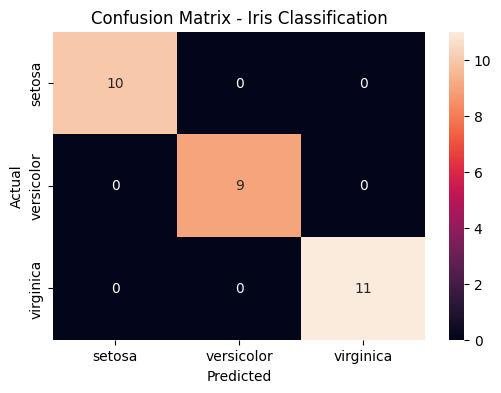

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Classification")
plt.show()
